# Case study on Pre-processing

Do the following on titanic dataset.
1. Load the dataset into python environment
2. Make ‘PassengerId’ as the index column
3. Check the basic details of the dataset
4. Fill in all the missing values present in all the columns in the dataset
5. Check and handle outliers in at least 3 columns in the dataset
6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**1. Load the dataset into python environment**

In [2]:
df=pd.read_csv(r'C:\Users\91999\Downloads\titanic_dataset.csv')

In [3]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**2. Make ‘PassengerId’ as the index column**

In [5]:
df1=df.set_index('PassengerId')

In [6]:
df1.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df1.tail(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**3. Check the basic details of the dataset**

In [8]:
len(df1)

891

In [9]:
df.shape

(891, 12)

In [10]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
df1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**4. Fill in all the missing values present in all the columns in the dataset**

In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* 3 columns( Age, Cabin, Embarked ) have missing values.

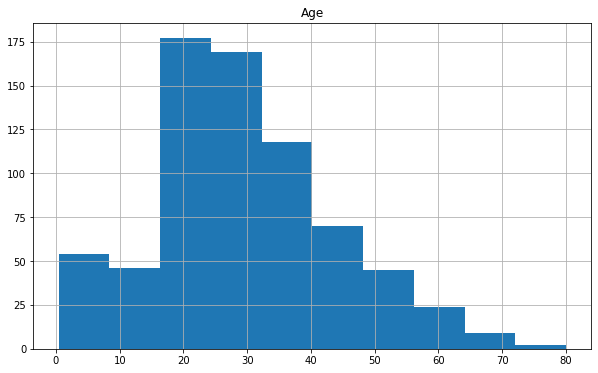

In [14]:
# Checking Skewness of the Feature
df2=df['Age']
df2.hist(figsize=(10,6))
plt.title('Age')
plt.show()

* from the figure it's clear that the values are left skewed. 
* hence Median is accepted

In [15]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
df.drop(['Cabin'], axis=1, inplace=True)

In [18]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [19]:
df['Embarked'].fillna(df['Embarked'].mode(),inplace=True)

In [68]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**5. Check and handle outliers in at least 3 columns in the dataset**

***'Age' Column***

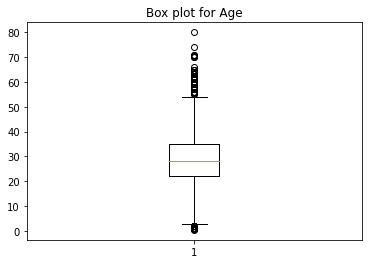

In [21]:
plt.boxplot(df['Age'])
plt.title('Box plot for Age')
plt.show()

In [22]:
Q1 = np.percentile(df['Age'], 25, interpolation = 'midpoint')
Q2 = np.percentile(df['Age'], 50, interpolation = 'midpoint')
Q3 = np.percentile(df['Age'], 75, interpolation = 'midpoint')

In [23]:
print(Q1)
print(Q2)
print(Q3)

22.0
28.0
35.0


In [24]:
df['Age'].median()

28.0

In [25]:
IQR= Q3-Q1

In [26]:
low_lim= Q1-1.5*IQR
upp_lim= Q3+1.5*IQR

In [27]:
print(low_lim)
print(upp_lim)

2.5
54.5


In [28]:
outlier=[]
for i in df['Age']:
    if(i>low_lim) or (i<upp_lim):
        outlier.append(i)

In [29]:
ind1=df['Age']>upp_lim
df.loc[ind1].index

Int64Index([ 11,  15,  33,  54,  94,  96, 116, 152, 170, 174, 195, 232, 252,
            268, 275, 280, 326, 366, 438, 456, 467, 483, 487, 492, 493, 545,
            555, 570, 587, 625, 626, 630, 647, 659, 672, 684, 694, 745, 772,
            829, 851, 879],
           dtype='int64')

In [30]:
df.drop([ 11,  15,  33,  54,  94,  96, 116, 152, 170, 174, 195, 232, 252,
            268, 275, 280, 326, 366, 438, 456, 467, 483, 487, 492, 545, 555,
            570, 587, 625, 630, 647, 659, 672, 684, 694, 745, 772, 829, 851,
            879], inplace= True)

In [31]:
ind1=df['Age']<low_lim
df.loc[ind1].index

Int64Index([  7,  16,  78, 119, 164, 172, 183, 205, 297, 305, 340, 381, 386,
            469, 479, 530, 642, 644, 755, 788, 803, 824, 827, 831],
           dtype='int64')

In [32]:
df.drop([  7,  78, 119, 164, 172, 183, 205, 297, 305, 340, 381, 386, 469,
            479, 530, 642, 644, 755, 788, 803, 824, 827, 831], inplace= True)

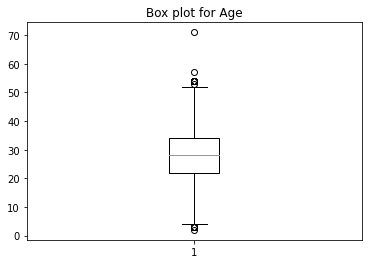

In [33]:
plt.boxplot(df['Age'])
plt.title('Box plot for Age')
plt.show()

***'Fare' Column***

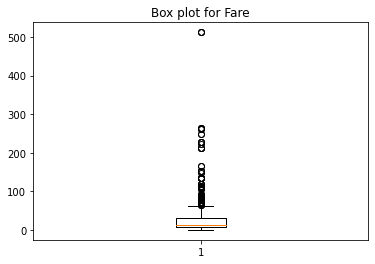

In [34]:
plt.boxplot(df['Fare'])
plt.title('Box plot for Fare')
plt.show()

In [35]:
Q1 = np.percentile(df['Fare'], 25, interpolation = 'midpoint')
Q2 = np.percentile(df['Fare'], 50, interpolation = 'midpoint')
Q3 = np.percentile(df['Fare'], 75, interpolation = 'midpoint')
print(Q1)
print(Q2)
print(Q3)

7.8958
13.45835
30.0708


In [36]:
df['Fare'].median()

13.45835

In [37]:
IQR= Q3-Q1
low_lim= Q1-1.5*IQR
upp_lim= Q3+1.5*IQR
print(low_lim)
print(upp_lim)

-25.366699999999994
63.333299999999994


In [38]:
outlier=[]
for i in df['Fare']:
    if(i>low_lim) or (i<upp_lim):
        outlier.append(i)

In [39]:
ind1=df['Fare']>upp_lim
df3=df.loc[ind1].index

In [40]:
df.drop(df3, inplace=True)

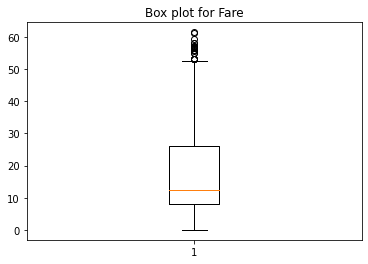

In [41]:
plt.boxplot(df['Fare'])
plt.title('Box plot for Fare')
plt.show()

In [42]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

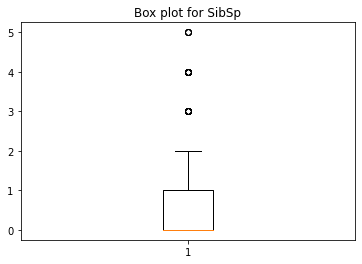

In [43]:
plt.boxplot(df['SibSp'])
plt.title('Box plot for SibSp')
plt.show()

In [44]:
Q1 = np.percentile(df['SibSp'], 25, interpolation = 'midpoint')
Q2 = np.percentile(df['SibSp'], 50, interpolation = 'midpoint')
Q3 = np.percentile(df['SibSp'], 75, interpolation = 'midpoint')
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [45]:
df['SibSp'].median()

0.0

In [46]:
IQR= Q3-Q1
low_lim= Q1-1.5*IQR
upp_lim= Q3+1.5*IQR
print(low_lim)
print(upp_lim)

-1.5
2.5


In [47]:
outlier=[]
for i in df['SibSp']:
    if(i>low_lim) or (i<upp_lim):
        outlier.append(i)

In [48]:
ind1=df['SibSp']<upp_lim
df4=df.loc[ind1].index

In [49]:
df.drop(df4, inplace=True)

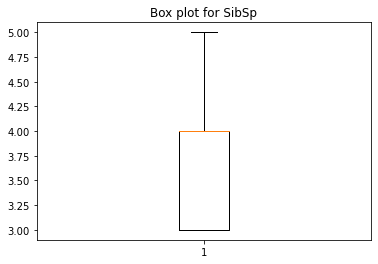

In [50]:
plt.boxplot(df['SibSp'])
plt.title('Box plot for SibSp')
plt.show()

**6. Do min max scaling on the feature set (Take ‘Survived’ as target)**

In [51]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [52]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

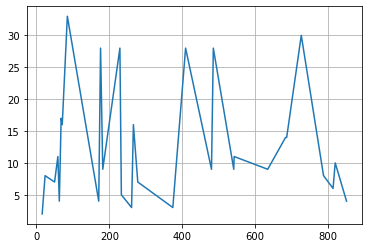

In [53]:
Age=df.Age
plt.plot(Age)
plt.grid()

In [54]:
df['Age'].describe()

count    30.000000
mean     12.700000
std       9.289037
min       2.000000
25%       6.250000
50%       9.000000
75%      16.000000
max      33.000000
Name: Age, dtype: float64

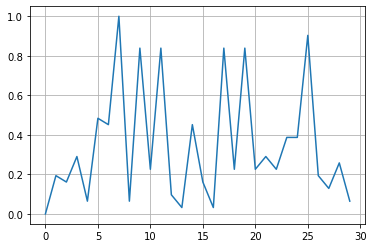

In [55]:
age_matrix= Age.values.reshape(-1,1)
Scaled= preprocessing.MinMaxScaler()
Scaled_Age= Scaled.fit_transform(age_matrix)
plt.plot(Scaled_Age)
plt.grid()

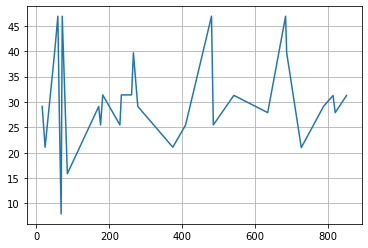

In [56]:
Fare=df.Fare
plt.plot(Fare)
plt.grid()

In [57]:
df['Fare'].describe()

count    30.000000
mean     30.497227
std       9.201160
min       7.925000
25%      25.466700
50%      29.125000
75%      31.387500
max      46.900000
Name: Fare, dtype: float64

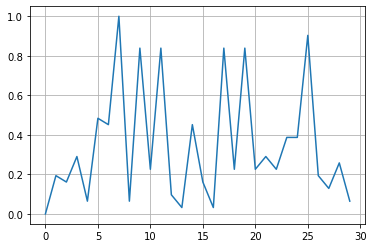

In [58]:
fare_matrix= Age.values.reshape(-1,1)
Scaled= preprocessing.MinMaxScaler()
Scaled_Fare= Scaled.fit_transform(fare_matrix)
plt.plot(Scaled_Fare)
plt.grid()

In [59]:
df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [60]:
titanic_data= df.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)

In [61]:
X = df.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = df['Survived']

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [63]:
model = LogisticRegression()

In [64]:
model.fit(X_train, Y_train)

LogisticRegression()

In [65]:
X_train_prediction = model.predict(X_train)

In [66]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.9166666666666666


In [67]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  1.0
